In [1]:
! pip install tqdm update_checker tqdm
! pip install tpot
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import itertools
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import FastICA
from sklearn.svm import SVC
from sklearn.cross_decomposition import PLSRegression
from sklearn.manifold import MDS
import os
from PIL import Image
from PIL import UnidentifiedImageError
import keras
import matplotlib.image as mpimg
from matplotlib.image import imread
import cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.8 MB/s 
     |████████████████████████████████| 139 kB 48.9 MB/s 
     |████████████████████████████████| 255.9 MB 46 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=bae18f566cf3c541e69d850475b5a019f06425ca29f83e7440134b16c3f8b62c
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [22]:
train_csv = pd.read_csv("/content/train.csv")
test_csv = pd.read_csv("/content/test_WyRytb0.csv")
print(train_csv.shape,test_csv.shape)
x = train_csv.iloc[:, :-1]
y = train_csv.iloc[:, -1]

(17034, 2) (7301, 1)


In [23]:
# Create list to store the data and set the path of the image to load
data_with_labels = []
labels = []
data_test = []
imagePath = '/content/drive/MyDrive/blurredd/blurry/*.jpg'

In [24]:
# Create the training dataset 
for i in train_csv.index: 
    nameOfFile = train_csv['image_name'][i]
    if os.path.exists(imagePath+nameOfFile):
        image = mpimg.imread(imagePath+nameOfFile)
        if (len(image.shape)!=3): # Verify if the image is correct 
            print("L'image N°",i,' : ',nameOfFile,"")
        else : 
            image = cv2.resize(image,(150,150))
            data_with_labels.append(image)
            labels.append(train_csv['label'][i])
print(len(data_with_labels))
print(len(labels))

0
0


In [25]:
import glob

glob.glob(imagePath)
imagess = [cv2.imread(images) for images in glob.glob(imagePath)]

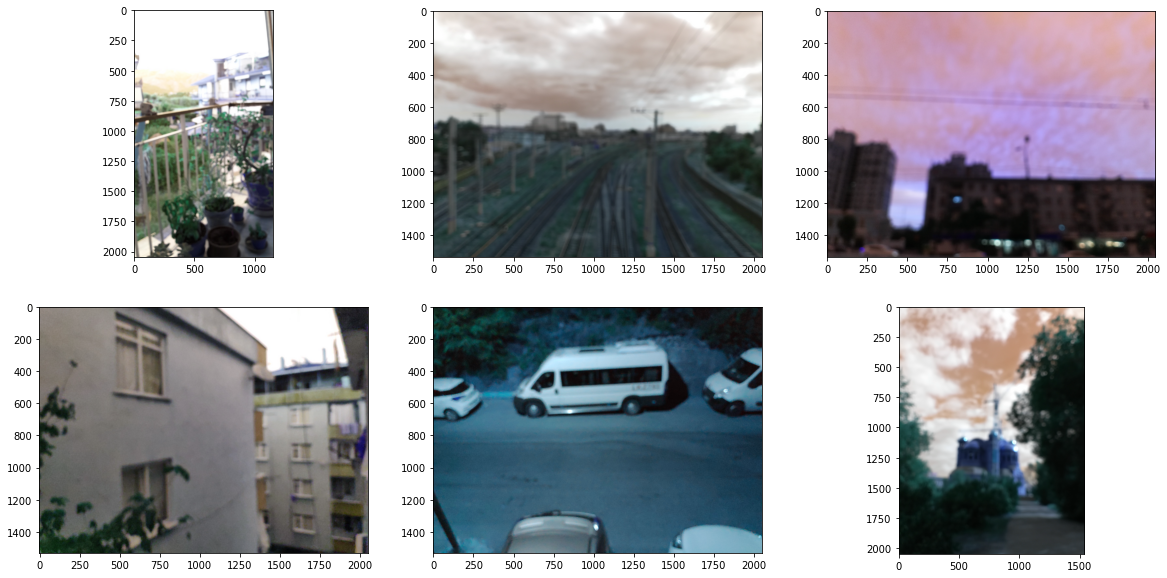

In [26]:
type(imagess)
rows = 2
cols = 3

fig = plt.figure(figsize=(20,10))
for j in range(0, rows*cols):
     fig.add_subplot(rows, cols, j+1)
     plt.imshow(imagess[j])

In [3]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(x)

In [4]:
tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2)
tpot.fit(x_sc, y)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.21675010168481618

Generation 2 - Current best internal CV score: -0.21117472835665127

Generation 3 - Current best internal CV score: -0.21117472835665127

Generation 4 - Current best internal CV score: -0.21117472835665127

Generation 5 - Current best internal CV score: -0.210079972567903

Best pipeline: ExtraTreesRegressor(SGDRegressor(input_matrix, alpha=0.01, eta0=0.1, fit_intercept=True, l1_ratio=0.0, learning_rate=constant, loss=epsilon_insensitive, penalty=elasticnet, power_t=100.0), bootstrap=True, max_features=0.2, min_samples_leaf=7, min_samples_split=9, n_estimators=100)


TPOTRegressor(generations=5, population_size=50, verbosity=2)

In [12]:
pls = PLSRegression(n_components=10, scale=True, max_iter=500, tol=1e-06, copy=True)
pls.fit(x_sc, y)

PLSRegression(n_components=10)

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(x_sc, y, train_size=0.95, random_state=2)
input_shape = [X_train.shape[1]]

In [14]:
model_svm = SVC(random_state=1)
model_svm.fit(X_train, Y_train)
y_pred_svm = model_svm.predict(X_test)
print(classification_report(Y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79       377
           1       0.89      0.74      0.81       494

    accuracy                           0.80       871
   macro avg       0.81      0.81      0.80       871
weighted avg       0.82      0.80      0.80       871



0.801377726750861

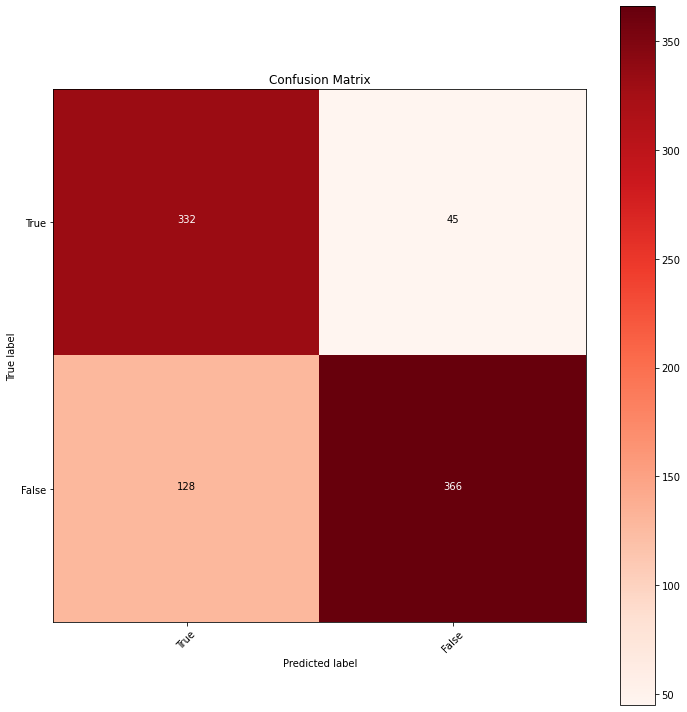

In [11]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Reds):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(Y_test, y_pred_svm)
target_names = ["True", "False"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(Y_test, y_pred_svm)

roc_auc_score for SVM:  0.8107636465168224


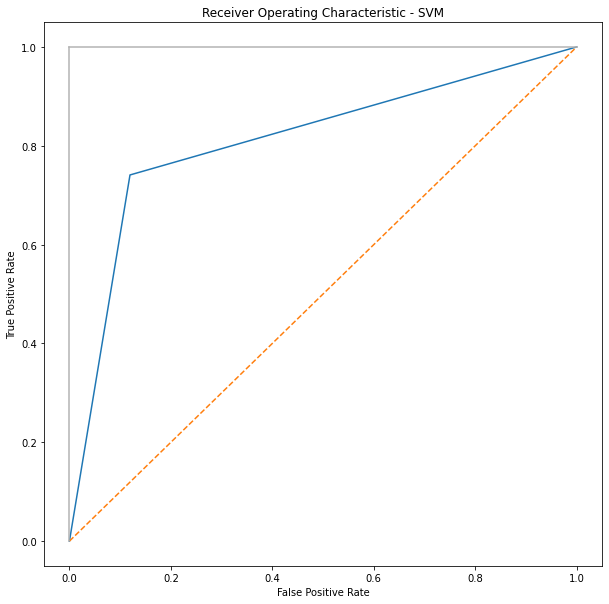

In [15]:
# plot for SVM
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_pred_svm)
print('roc_auc_score for SVM: ', roc_auc_score(Y_test, y_pred_svm))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [16]:
#KNN model

model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, Y_train)
y_pred_KNN = model_KNN.predict(X_test)
print(classification_report(Y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.73      0.88      0.79       377
           1       0.89      0.75      0.81       494

    accuracy                           0.80       871
   macro avg       0.81      0.81      0.80       871
weighted avg       0.82      0.80      0.80       871



0.8025258323765786

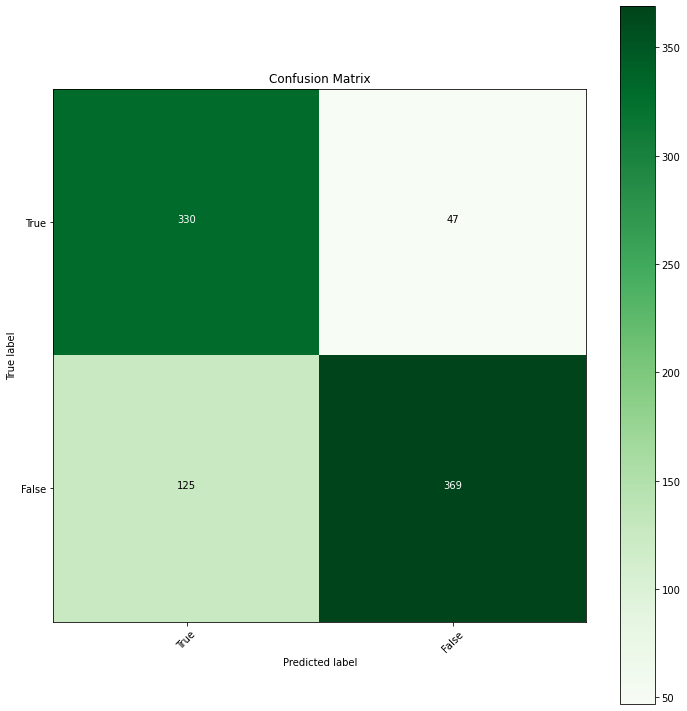

In [17]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(Y_test, y_pred_KNN)
target_names = ["True", "False"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(Y_test, y_pred_KNN)

roc_auc_score for KNN:  0.811147563869887


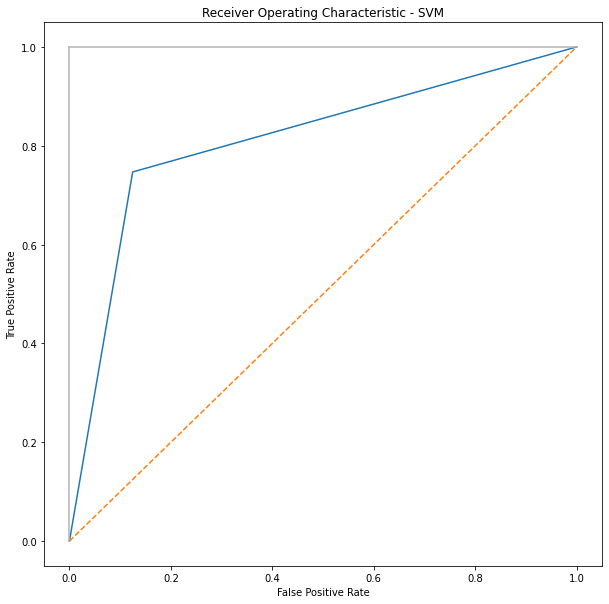

In [18]:
# plot for KNN
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_pred_KNN)
print('roc_auc_score for KNN: ', roc_auc_score(Y_test, y_pred_KNN))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
#RandomForestClassifier(ensemble) model

model_RFC = RandomForestClassifier(random_state = 1)
model_RFC.fit(X_train, Y_train)
y_pred_RFC = model_RFC.predict(X_test)
print(classification_report(Y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       377
           1       0.92      0.79      0.85       494

    accuracy                           0.84       871
   macro avg       0.84      0.85      0.84       871
weighted avg       0.85      0.84      0.84       871



0.8404133180252583

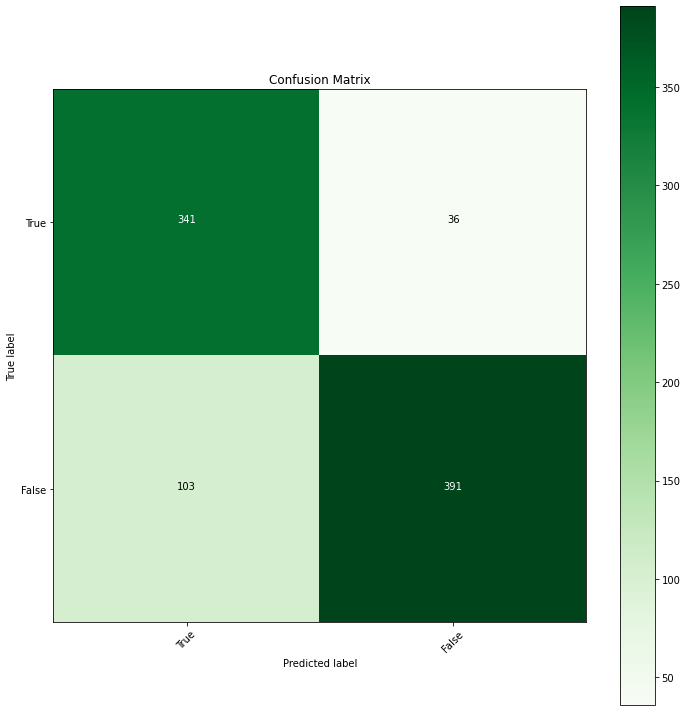

In [27]:
#===========================CONSTRUCTING THE CONFUSION MATRIX=============================#
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Greens):
    
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm = confusion_matrix(Y_test, y_pred_RFC)
target_names = ["True", "False"]
plot_confusion_matrix(cm, target_names, normalize=False, title='Confusion Matrix')
accuracy_score(Y_test, y_pred_RFC)

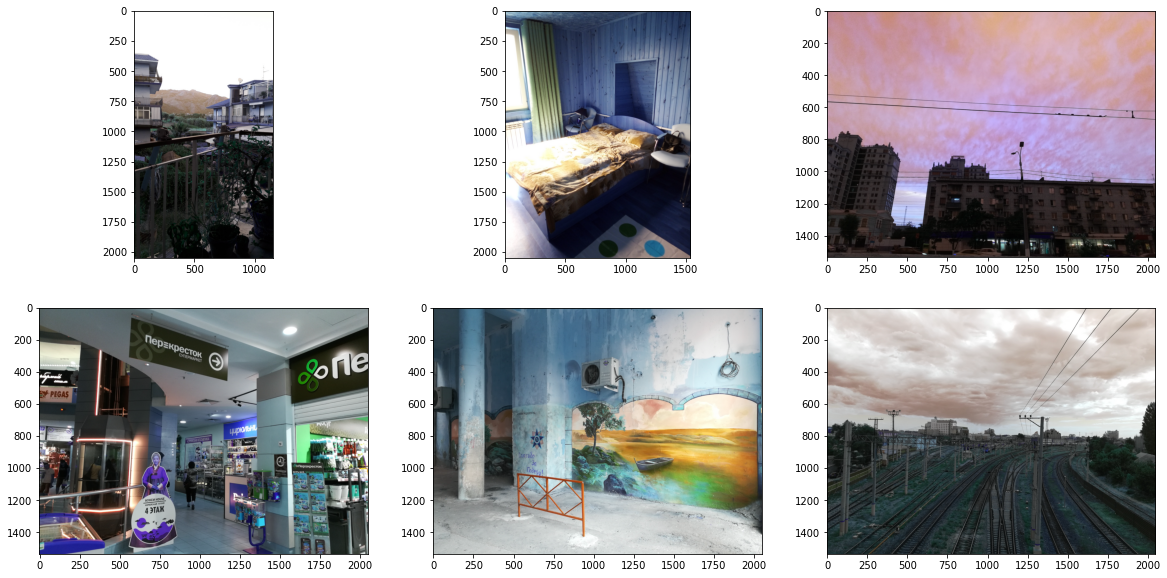

In [30]:
type(imagesss)
rows = 2
cols = 3

fig = plt.figure(figsize=(20,10))
for j in range(0, rows*cols):
     fig.add_subplot(rows, cols, j+1)
     plt.imshow(imagesss[j])

roc_auc_score for RFC:  0.8480036297640654


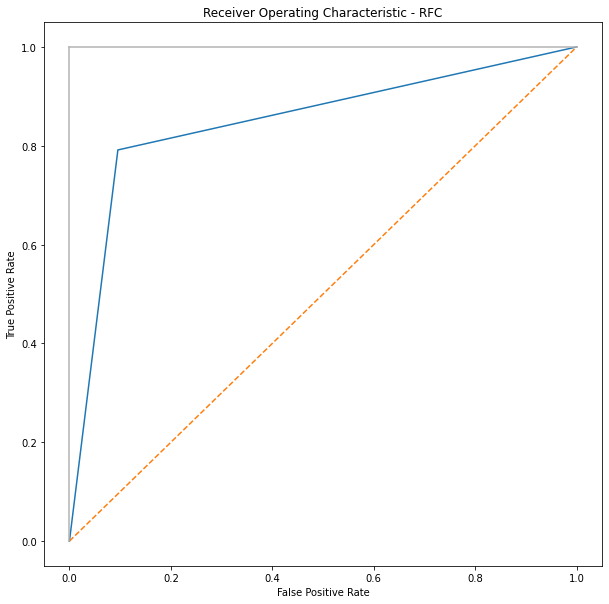

In [21]:
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_pred_RFC)
print('roc_auc_score for RFC: ', roc_auc_score(Y_test, y_pred_RFC))

plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - RFC')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()